In [3]:
import laspy

In [4]:
las_file = laspy.read("data/SaintLouisLiDAR.las")

attributes_to_print = list(las_file.point_format.dimension_names)
attributes_to_print
# X,Y,Z, red, green, blue, intensity harici 0 tutmaktadır
# return_number ve number_of_returns 0 değil değişmektedir

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'red',
 'green',
 'blue']

In [5]:
print(las_file.point_format["classification"])
print(type(las_file))


DimensionInfo(name='classification', kind=<DimensionKind.BitField: 3>, num_bits=5, num_elements=1, is_standard=True, description='', offsets=None, scales=None)
<class 'laspy.lasdata.LasData'>


In [6]:
point = las_file.points[0]
print(f"X: {point.x}, Y: {point.y}, Z: {point.z}, Intensity: {point.intensity}, classification: {point.classification}")

X: <ScaledArrayView(729911.303)>, Y: <ScaledArrayView(4301275.08)>, Z: <ScaledArrayView(160.166)>, Intensity: 12592, classification: <SubFieldView(0)>


In [7]:
import random

len_data = len(las_file.points)
for i in range(1000):
    rand = random.randint(0, len_data)
    point = las_file.points[rand]
    # point = las_file.points[i]

    print(", ".join([f"{attr}: {getattr(point, attr)}" for attr in attributes_to_print]))

    # print(f"X: {point.x}, Y: {point.y}, Z: {point.z}, Intensity: {point.intensity}, classification: {point.classification}")

X: 1106983, Y: 353079, Z: 192512, intensity: 8800, return_number: <SubFieldView(2)>, number_of_returns: <SubFieldView(2)>, scan_direction_flag: <SubFieldView(0)>, edge_of_flight_line: <SubFieldView(0)>, classification: <SubFieldView(0)>, synthetic: <SubFieldView(0)>, key_point: <SubFieldView(0)>, withheld: <SubFieldView(0)>, scan_angle_rank: 0, user_data: 0, point_source_id: 0, red: 17920, green: 21248, blue: 18432
X: 2209164, Y: 1566554, Z: 195250, intensity: 2208, return_number: <SubFieldView(2)>, number_of_returns: <SubFieldView(2)>, scan_direction_flag: <SubFieldView(0)>, edge_of_flight_line: <SubFieldView(0)>, classification: <SubFieldView(0)>, synthetic: <SubFieldView(0)>, key_point: <SubFieldView(0)>, withheld: <SubFieldView(0)>, scan_angle_rank: 0, user_data: 0, point_source_id: 0, red: 29696, green: 36864, blue: 27392
X: 906660, Y: 676943, Z: 141868, intensity: 8864, return_number: <SubFieldView(2)>, number_of_returns: <SubFieldView(2)>, scan_direction_flag: <SubFieldView(0)>,

     id                                           geometry
0  None  POLYGON ((-90.33490 38.84271, -90.33493 38.842...
1  None  POLYGON ((-90.33510 38.84293, -90.33516 38.842...
2  None  POLYGON ((-90.33615 38.84317, -90.33609 38.843...
3  None  POLYGON ((-90.33544 38.84298, -90.33556 38.843...
4  None  POLYGON ((-90.33579 38.84305, -90.33591 38.843...
<class 'geopandas.geodataframe.GeoDataFrame'>
POLYGON ((-90.33489907173997 38.84271003434677, -90.33493040342807 38.84265361009307, -90.33500050041052 38.84263521162724, -90.33510624548495 38.84264048281274, -90.33514855443961 38.84268144644397, -90.33516123674939 38.84273316162388, -90.33515233834753 38.84277581318393, -90.33517168149639 38.842844822308955, -90.33515484363004 38.842904434496866, -90.33507659382654 38.84294550276389, -90.3349962922464 38.84294366942873, -90.33492230478973 38.84287055569336, -90.33489158543628 38.84281271471208, -90.334878157372 38.84278098134071, -90.33489907173997 38.84271003434677))


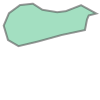

In [11]:
import geopandas as gpd
import pandas as pd

shape_file = gpd.read_file("data/SaintLouisTrees/SaintLouisTrees.shp")
print(shape_file.head())
print(type(shape_file))

print(pd.DataFrame(shape_file).loc[0, "geometry"])
pd.DataFrame(shape_file).loc[1, "geometry"]

In [9]:
import fiona
from shapely.geometry import shape

# Open the shapefile
with fiona.open("data/SaintLouisTrees/SaintLouisTrees.shp") as shapefile:
    # Iterate over the records
    for record in shapefile:
        # Get the geometry from the record
        geometry = shape(record['geometry'])
        
        # Print the area of the geometry
        print(geometry.area)

7.115655188384098e-08
1.1365148522838303e-07
1.921133824451442e-07
8.296673169401849e-08
3.2264868388519947e-08
1.21158714514063e-07
4.1752926207133026e-07
3.733272299569787e-08
1.1497036826441163e-08
1.8874966353578566e-08
9.792392440896618e-08
1.5306775943860883e-07
8.264277066972664e-09
1.9026042593017393e-08
2.4172338586108694e-08
4.0325323242775113e-08
1.1251894253155958e-08
2.3270205000997277e-08
1.3158693190812254e-07
5.525345702919973e-08
7.195332471938668e-08
8.251115489810663e-05
